In [1]:
%pip install -q matplotlib torch imageio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import random
import matplotlib.pyplot as plt
import torch
import os
import shutil
import imageio

In [3]:
if os.path.exists("results"):
    shutil.rmtree("results")
os.makedirs("results", exist_ok=True)

In [4]:
def draw_graph(w, x_vals, y_vals):
    plt.scatter(x_vals, y_vals, s=10, color="g", label="Data")
    x_line = [0, 5]
    y_line = [0, 15]
    plt.plot(x_line, y_line, "b--", label="y=3x")
    y_model_line = [w * x for x in x_line]
    plt.plot(x_line, y_model_line, "r", label=f"y={w:.2f}x")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression")
    plt.legend()

    plt.show()

def save_graph(w, epoch, x_vals, y_vals):
    plt.scatter(x_vals, y_vals, s=10, color="g", label="Data")
    x_line = [0, 5]
    y_line = [0, 15]
    plt.plot(x_line, y_line, "b--", label="y=3x")
    y_model_line = [w * x for x in x_line]
    plt.plot(x_line, y_model_line, "r", label=f"y={w:.2f}x")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression")
    plt.legend()

    plt.savefig(f"results/{epoch}.png")
    plt.close()

In [5]:
datas = []
for i in range(200):
    x = random.uniform(0, 5)
    e = 2 * (random.random() - 0.5)
    y = 3 * x + e
    datas.append((x, y))

x_vals, y_vals = zip(*datas)

In [6]:
model = torch.nn.Linear(1, 1, bias=False)

x_tensor = torch.tensor(x_vals, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_vals, dtype=torch.float32).unsqueeze(1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

w = model.weight.item()
print(f"Initial w: {w}")

Initial w: 0.3331184387207031


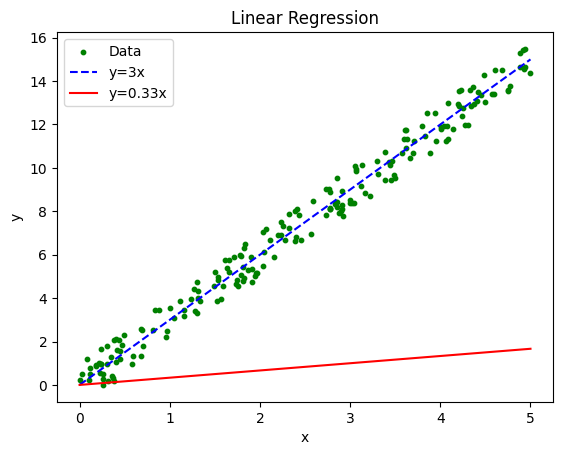

In [7]:
draw_graph(w, x_vals, y_vals)

In [8]:
print(f'Initial w = {model.weight.item():.4f}')
print(f"y = {model.weight.item():.4f}x")

Initial w = 0.3331
y = 0.3331x


In [9]:
for epoch in range(300):
    save_graph(model.weight.item(), epoch, x_vals, y_vals)
    if epoch % 5 == 0:
        print(f'Epoch {epoch}, w = {model.weight.item():.4f}')
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

Epoch 0, w = 0.3331
Epoch 5, w = 0.5369
Epoch 10, w = 0.7250
Epoch 15, w = 0.8988
Epoch 20, w = 1.0593
Epoch 25, w = 1.2075
Epoch 30, w = 1.3443
Epoch 35, w = 1.4707
Epoch 40, w = 1.5874
Epoch 45, w = 1.6952
Epoch 50, w = 1.7948
Epoch 55, w = 1.8867
Epoch 60, w = 1.9716
Epoch 65, w = 2.0500
Epoch 70, w = 2.1224
Epoch 75, w = 2.1893
Epoch 80, w = 2.2510
Epoch 85, w = 2.3081
Epoch 90, w = 2.3607
Epoch 95, w = 2.4094
Epoch 100, w = 2.4543
Epoch 105, w = 2.4958
Epoch 110, w = 2.5341
Epoch 115, w = 2.5695
Epoch 120, w = 2.6021
Epoch 125, w = 2.6323
Epoch 130, w = 2.6602
Epoch 135, w = 2.6859
Epoch 140, w = 2.7097
Epoch 145, w = 2.7316
Epoch 150, w = 2.7519
Epoch 155, w = 2.7706
Epoch 160, w = 2.7879
Epoch 165, w = 2.8038
Epoch 170, w = 2.8186
Epoch 175, w = 2.8322
Epoch 180, w = 2.8448
Epoch 185, w = 2.8564
Epoch 190, w = 2.8671
Epoch 195, w = 2.8770
Epoch 200, w = 2.8861
Epoch 205, w = 2.8946
Epoch 210, w = 2.9024
Epoch 215, w = 2.9096
Epoch 220, w = 2.9162
Epoch 225, w = 2.9224
Epoch 230,

In [10]:
w = model.weight.item()
print(f"w: {w}")

w: 2.9740676879882812


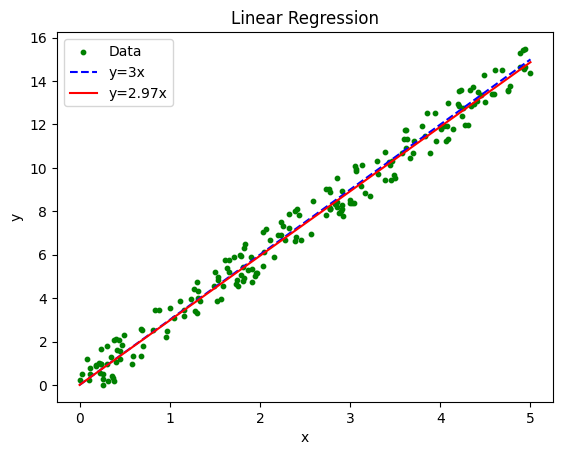

In [11]:
draw_graph(w, x_vals, y_vals)

In [14]:
frames = []

for i in range(1, 501):
    path = f"results/{i}.png"
    if os.path.exists(path):
        frames.append(imageio.imread(path))
    
imageio.mimsave("result.gif", frames, duration=0.001, loop=0)

/var/folders/x1/3m0y4svj22xb1z4_b903dt5w0000gn/T/ipykernel_91787/471734129.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(path))
